#### **하노이탑**

)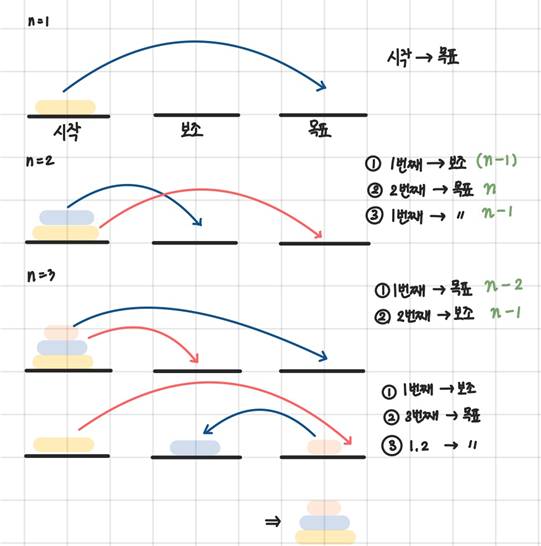

In [ ]:
answer = []
def hanoi(n,st,sp,end):
    global answer
    if n == 1:
        answer.append([st,end])
        return
    else:
        hanoi(n-1,st,end,sp)
        answer.append([st,end])
        hanoi(n-1,sp,st,end)

def solution(n):
    hanoi(n,1,2,3)
    return answer

solution(2)

[[1, 2], [1, 3], [2, 3]]

### **Backtracking**

#### **미로**

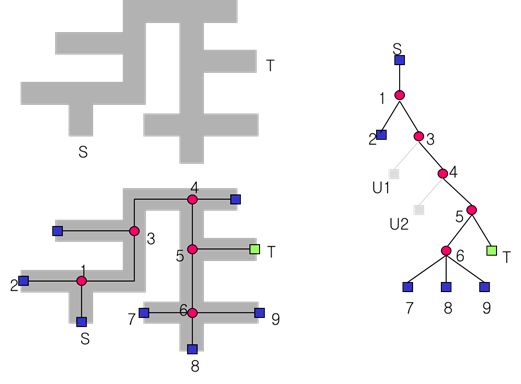

In [ ]:
my_maze={"S":{"1"},
  "1":{"2","3"},
  "3":{"U1","4"},
  "4":{"U2","5"},
  "5":{"6","T"},
  "6":{"7","8","9"}
}

In [ ]:
import sys

visited=[]
prev = {}
path = []
def maze(G,v):
  visited.append(v)
  if v=='T':  # 최적해(출구) 찾음
    print("성공")
    print("방문순서:", visited) # 방문순서 출력하기
    find_path(v)    # 최적경로 복기하기 (Target->Start)
    print("최적경로:", path)
    #sys.exit()
  if v in G.keys():
    for x in G[v]:
      if x not in visited:
        prev[x] = v # key : 현재 방문 노드 , value : 직전 방문 노드
        #print(prev)
        maze(G,x)

def find_path(v):
  path.append(v)
  if v in prev.keys():
    find_path(prev[v])  # 직전에 방문한 노드를 역추적

maze(my_maze,"S")

성공
방문순서: ['S', '1', '3', '4', 'U2', '5', '6', '9', '8', '7', 'T']
최적경로: ['T', '5', '4', '3', '1', 'S']


#### **색칠하기**

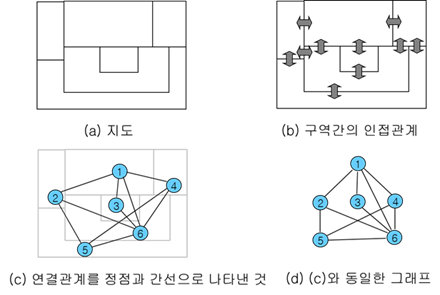

In [ ]:
my_color = {
     1:{2,3,4,6},
     2:{1,5,6},
     3:{1,6},
     4:{1,5,6},
     5:{2,4,6},
     6:{1,2,3,4,5}
}

In [ ]:
color = {}  # dictionary 초기화
def kColoring(G, i, c):
    if valid(G, i, c):    # 겹치지 않으면
        color[i] = c
        if i == len(G) :
            return True
        else :
            result = False
            d = 1
            while result == False and d <= k :
                result = kColoring(G, i+1, d)
                d += 1
        return result
    else :
        return False

def valid(G, i, c):
    for j in range(1,i) :
        if j in G[i] and color[j] == c :
            return False
    return True

k=3     # 반복문으로 최소 k 찾을 수 있겠다!
print(kColoring(my_color, 1, 1))
print(k, color)

True
3 {1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 3}


## **A* 알고리즘**

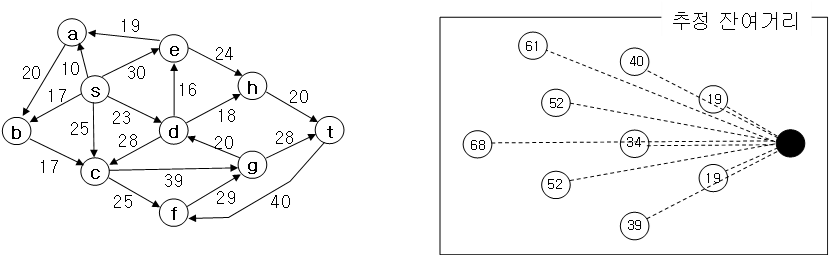

In [ ]:
my_graph = {"s":{"a":10, "b":17, "c":25, "d":23, "e":30},
            "a":{"b":20},
            "b":{"c":17},
            "c":{"f":25, "g":39},
            "d":{"c":28, "e":16, "h":18},
            "e":{"a":19, "h":24},
            "f":{"g":29},
            "g":{"d":20, "t":28},
            "h":{"t":20},
            "t":{"f":40}}
my_h = {"s":52, "a":61, "b":68, "c":52, "d":34, #최소 잔여거리
        "e":40, "f":39, "g":19, "h":19, "t":0}

In [ ]:
path=[]
visited = []

def A_star(G,H,s,t):
    Q=list(G.keys())
    g={}; f={}; h={}
    prev = {}
    for u in Q :
        g[u] = 1000; f[u] = 1000; # 초기화
        h[u] = H[u] # 잔여 추정거리

    g[s] = 0; f[s] = h[s] # 시작정점 f[s] = 0 + h[s]

    while len(Q) > 0 :
        u = deleteMin(Q,f)
        visited.append(u)   # 방문처리
        Q.remove(u) # 방문한 노드는 제거

        if u == t :     # 목적지 도달
            print("prev :",prev)
            find_path(prev,u)
            print("최적해 :",f[u])
            print("최적 경로 :",path)
            print("방문 경로 :",visited)
        else :
            for v in G[u].keys() : # 인접노드
                if v in Q and g[u] + G[u][v] < g[v] : # 아직 방문하지 않았고, 현재까지의 경로가 갱신될 여지가 있다면,
                    g[v] = g[u] + G[u][v]
                    f[v] = g[v] + h[v] # 평가함수 값 갱신
                    prev[v] = u  # v : 현재 방문한 노드, u : v직전에 방문한 노드



def deleteMin(Q, f):    # f값이 가장 작은 노드 u 반환
    min_f = float("inf")
    for q in Q :
        if f[q] < min_f :
            min_f = f[q]
            u = q
    return u

def find_path(prev,v):  # 경로 역추적
  path.append(v)
  if v in prev.keys():
    find_path(prev,prev[v])

A_star(my_graph,my_h,"s","t")

prev : {'a': 's', 'b': 's', 'c': 's', 'd': 's', 'e': 's', 'h': 'd', 't': 'h'}
최적해 : 61
최적 경로 : ['t', 'h', 'd', 's']
방문 경로 : ['s', 'd', 'h', 't']
